In [87]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import matplotlib.pylab as plt
%matplotlib inline

import numpy as np
np.random.seed(0)

In [88]:
(X_train, y_train) , (X_test , y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

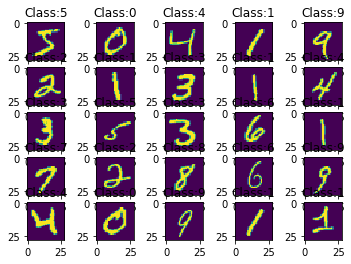

In [89]:
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx])
    plt.title('Class:{}'.format(y_train[idx]))

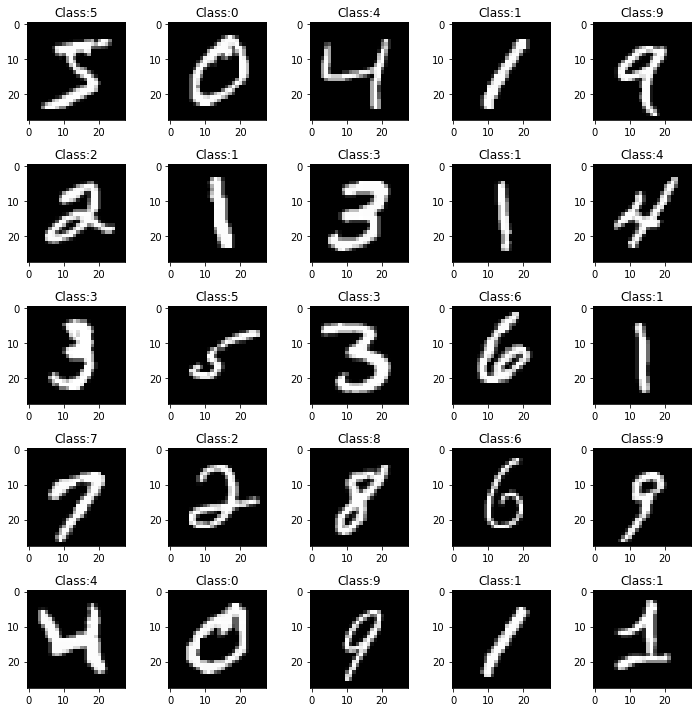

In [90]:
plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx],cmap='gray')
    plt.title('Class:{}'.format(y_train[idx]))
plt.tight_layout()

In [91]:
X_train.shape

(60000, 28, 28)

In [92]:
img_rows,img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape( -1 ,img_rows,img_cols, 1)
X_test = X_test.reshape( -1 ,img_rows,img_cols, 1)

input_shape = (img_rows,img_cols,1)

X_train.shape , X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [93]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255


SyntaxError: can't assign to literal (<ipython-input-60-8bd297480a82>, line 1)

In [94]:
if len(y_train.shape)==1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train,num_classes)
    y_test = to_categorical(y_test,num_classes)

In [95]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
             
             
    Conv2D(filters=64, kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
            
    Flatten(),
            
    Dense(512,activation='relu'),
    Dense(num_classes,activation='softmax')
    
              
             ])

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [98]:
model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs = 5,
    validation_data=(X_test , y_test)
    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0372 - val_accuracy: 0.9885
Epoch 2/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0390 - val_accuracy: 0.9880
Epoch 3/5
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch 4/5
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0301 - val_accuracy: 0.9915
Epoch 5/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0378 - val_accuracy: 0.9892


In [97]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.04942121379263699, 0.9858999848365784]

In [99]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.037787916021898016, 0.9891999959945679]